In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
class NutritionAnalysis:
    def __init__(self,file_path):
        self.df = pd.read_csv(file_path)

    def get_summary(self):
        return self.df.describe()

    def filter_by_category(self,category):
        if category not in self.df['Category'].unique():
            print(f"Category `{category}` not found")
            return None
        return self.df[self.df['Category'] == category]

    def get_high_protein_food(self,threshold=20):
        return self.df[self.df['Protein'] >= threshold].sort_values(by='Protein',ascending=False)

    def get_low_calories_food(self,threshold=100):
        return self.df[self.df['Calories'] <= threshold].sort_values(by='Calories',ascending=True)


    def calculate_calories_density(self):
        calories = self.df['Calories'].to_numpy(dtype=float)
        protein = self.df['Protein'].to_numpy(dtype=float)
        carbs = self.df['Carbohydrates'].to_numpy(dtype=float)
        fats = self.df['Fat'].to_numpy(dtype=float)

        total_macros = protein + carbs + fats

        density = np.divide(calories,total_macros,out=np.zeros_like(calories),where=total_macros!=0)
        self.df['Calories_Density'] = np.round(density,2)
        return self.df[['Food_Item','Calories_Density']].head()

    def compare_foods(self,food1_name,food2_name):
        f1 = self.df[self.df['Food_Item'] == food1_name]
        f2 = self.df[self.df['Food_Item'] == food2_name]

        if f1.empty or f2.empty:
            print('One or Both foods not Foubnd!')
            return None
        
        macros = ['Protein','Carbohydrates','Fat']


        f1_vals = f1[macros].to_numpy().flatten()
        f2_vals = f2[macros].to_numpy().flatten()


        x = np.arange(len(macros))
        width = 0.35

        fig, ax = plt.subplots()
        ax.bar(x - width/2,f1_vals,width,label=food1_name)
        ax.bar(x + width/2,f2_vals,width,label=food2_name)

        ax.set_ylabel('Grams')
        ax.set_title(f"Comparison of {food1_name} and {food2_name}")
        ax.set_xticks(x)
        ax.set_xticklabels(macros)
        ax.legend()
        plt.show()

    def plot_category_distribution(self):


        counts = self.df['Category'].value_counts()

        plt.figure(figsize=(8,8))
        plt.pie(counts,labels=counts.index,autopct='%1.1f%%',startangle=140)
        plt.axis('equal')
        plt.show()


    def get_vegan_foods(self):

        non_vegan_categories = ['Meat','Fish','Seafood','Dairy/Egg']

        return self.df[~self.df['Category'].isin(non_vegan_categories)]


    def plot_protein_vs_fat(self):

        plt.figure(figsize=(10,6))
        plt.scatter(self.df['Protein'],self.df['Fat'],color='blue',alpha=0.7)

        plt.title('Protein vs Fat')
        plt.xlabel('Protein')
        plt.ylabel('Fat')
        plt.grid(True,linestyle='--',alpha=0.5)

        for i, row in self.df.iterrows():
            if row['Protein'] > 20 or row['Fat'] > 20:
                plt.annotate(row['Food_Item'],(row['Protein'],row['Fat']),fontsize=8)

        plt.show()

    def get_top_protein_source(self,n=5):

        top_foods = self.df.sort_values(by='Protein',ascending=False).head(n)
        return top_foods[['Food_Item','Category','Protein']]

In [3]:
analyzer = NutritionAnalysis('nutrition.csv')

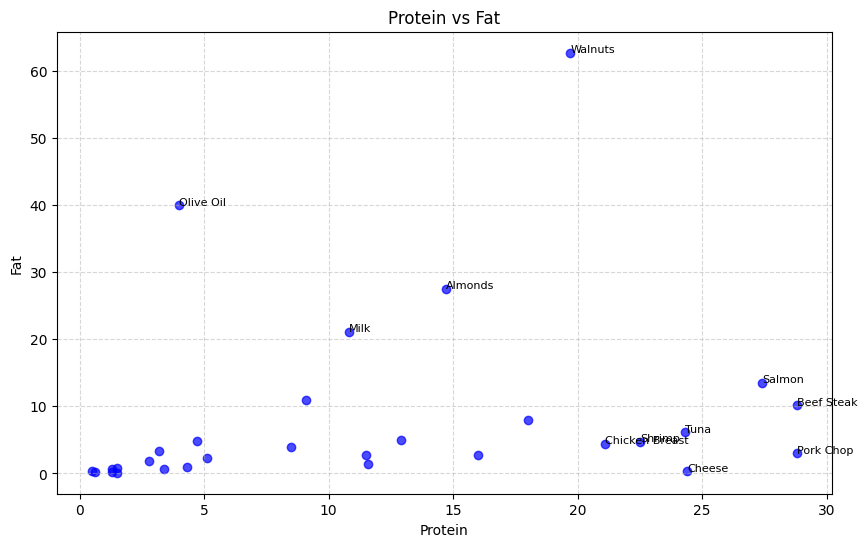

In [11]:
analyzer.plot_protein_vs_fat()

In [4]:
analyzer.get_vegan_foods()

,Food_Item,Category,Calories,Protein,Carbohydrates,Fat
3,Tofu,Plant-Based,129,11.5,5.4,2.8
4,Lentils,Plant-Based,183,12.9,11.3,5.0
5,Brown Rice,Grains,242,8.5,20.3,4.0
6,Quinoa,Grains,316,4.7,26.2,4.8
7,Oats,Grains,272,2.8,35.2,1.8
8,Sweet Potato,Vegetable,64,3.4,12.5,0.7
9,Broccoli,Vegetable,88,1.5,14.0,0.1
10,Spinach,Vegetable,57,4.3,10.0,0.9
11,Almonds,Nut/Seed,346,14.7,2.8,27.5
12,Walnuts,Nut/Seed,446,19.7,17.4,62.7


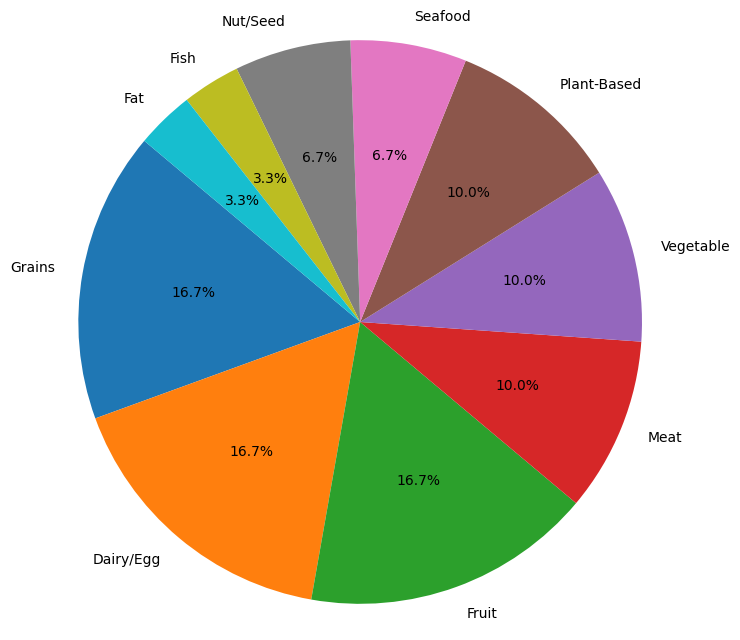

In [5]:
analyzer.plot_category_distribution()

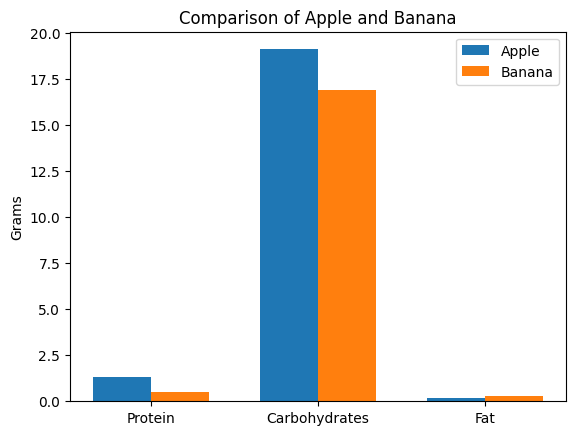

In [6]:

analyzer.compare_foods('Apple','Banana')

In [7]:
analyzer.get_summary()


,Calories,Protein,Carbohydrates,Fat
count,30.000000,30.000000,30.000000,30.000000
mean,186.300000,11.476667,12.646667,8.153333
std,110.855653,9.478385,10.157339,13.645354
min,57.000000,0.500000,0.500000,0.100000
25%,95.250000,3.250000,4.125000,0.825000
50%,145.500000,9.950000,10.450000,3.200000
75%,244.750000,19.275000,17.275000,7.525000
max,498.000000,28.800000,43.800000,62.700000


In [8]:
analyzer.filter_by_category('Meat')

,Food_Item,Category,Calories,Protein,Carbohydrates,Fat
0,Chicken Breast,Meat,263,21.1,3.7,4.4
20,Beef Steak,Meat,245,28.8,1.6,10.2
21,Pork Chop,Meat,201,28.8,3.2,3.0


In [9]:
analyzer.calculate_calories_density()

,Food_Item,Calories_Density
0,Chicken Breast,9.01
1,Salmon,3.05
2,Egg,4.87
3,Tofu,6.55
4,Lentils,6.27


In [10]:
analyzer.get_low_calories_food()

,Food_Item,Category,Calories,Protein,Carbohydrates,Fat,Calories_Density
10,Spinach,Vegetable,57,4.3,10.0,0.9,3.75
8,Sweet Potato,Vegetable,64,3.4,12.5,0.7,3.86
15,Apple,Fruit,83,1.3,19.1,0.2,4.03
16,Banana,Fruit,86,0.5,16.9,0.3,4.86
9,Broccoli,Vegetable,88,1.5,14.0,0.1,5.64
19,Avocado,Fruit,91,0.6,14.0,0.2,6.15
18,Blueberries,Fruit,93,1.5,10.8,0.8,7.10
2,Egg,Dairy/Egg,94,16.0,0.5,2.8,4.87
17,Orange,Fruit,99,1.3,18.4,0.7,4.85
